In [2]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# importing cleaned and filtered dataframes

c_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe', index_col=0)
f_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe', index_col=0)

#print('clean_df = ', clean_df.describe())
#print('\n')
#print('filtered_df = ', filtered_df.describe())

Take a look at out target varriable "Price"


In [3]:
f_df = f_df[f_df['price'] > f_df['price'].quantile(.10)]
#f_df = f_df[f_df['condition'] > f_df['condition'].quantile(.05)]
f_df.describe()

,price,yr_renovated,yr_built,condition,grade,zipcode,lat,long,cat_zipcode
count,15541.00,393.00,15541.00,15541.00,15541.00,15541.00,15541.00,15541.00,15541.00
mean,433240.88,1993.33,1971.67,3.39,4.41,98079.71,47.56,-122.21,98079.71
std,126193.51,17.09,28.80,0.63,0.84,52.16,0.14,0.14,52.16
min,234300.00,1934.00,1900.00,1.00,0.00,98001.00,47.16,-122.52,98001.00
25%,325000.00,1984.00,1953.00,3.00,4.00,98034.00,47.46,-122.33,98034.00
50%,420000.00,1996.00,1976.00,3.00,4.00,98070.00,47.57,-122.24,98070.00
75%,532000.00,2007.00,1997.00,4.00,5.00,98118.00,47.69,-122.12,98118.00
max,700180.00,2015.00,2015.00,5.00,8.00,98199.00,47.78,-121.32,98199.00


In [4]:
c_df.head()

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,221900.00,10/13/2014,nan,1955,3,4,NONE,NaN,98178,47.51,-122.26,NaN,NONE,Average,7 Average,98178
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
2,180000.00,2/25/2015,nan,1933,3,3,NONE,NO,98028,47.74,-122.23,NO,NONE,Average,6 Low Average,98028
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074


In [5]:
c_df = c_df[c_df['price'] < c_df['price'].quantile(.97)]

c_matrix = c_df.corr()
c_matrix['price']


price           1.00
yr_renovated    0.20
yr_built        0.06
condition       0.04
grade           0.66
zipcode        -0.02
lat             0.40
long            0.06
cat_zipcode    -0.02
Name: price, dtype: float64

In [6]:
c_df['price'].describe()

count     20934.00
mean     494837.35
std      236338.99
min       78000.00
25%      319000.00
50%      443000.00
75%      620000.00
max     1380000.00
Name: price, dtype: float64

In [7]:
f_matrix = f_df.corr()
f_matrix['price']

price           1.00
yr_renovated    0.07
yr_built       -0.02
condition       0.03
grade           0.43
zipcode         0.02
lat             0.42
long            0.05
cat_zipcode     0.02
Name: price, dtype: float64

In [8]:
f_df

,price,date,yr_renovated,yr_built,condition,grade,view,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
1,538000.00,12/9/2014,1991.00,1951,3,4,NONE,NO,98125,47.72,-122.32,NO,NONE,Average,7 Average,98125
3,604000.00,12/9/2014,nan,1965,5,4,NONE,NO,98136,47.52,-122.39,NO,NONE,Very Good,7 Average,98136
4,510000.00,2/18/2015,nan,1987,3,5,NONE,NO,98074,47.62,-122.05,NO,NONE,Average,8 Good,98074
6,257500.00,6/27/2014,nan,1995,3,4,NONE,NO,98003,47.31,-122.33,NO,NONE,Average,7 Average,98003
7,291850.00,1/15/2015,nan,1963,3,4,NONE,NO,98198,47.41,-122.31,NO,NaN,Average,7 Average,98198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,5/21/2014,nan,2009,3,5,NONE,NO,98103,47.70,-122.35,NO,NONE,Average,8 Good,98103
21593,400000.00,2/23/2015,nan,2014,3,5,NONE,NO,98146,47.51,-122.36,NO,NONE,Average,8 Good,98146
21594,402101.00,6/23/2014,nan,2009,3,4,NONE,NO,98144,47.59,-122.30,NO,NONE,Average,7 Average,98144
21595,400000.00,1/16/2015,nan,2004,3,5,NONE,NaN,98027,47.53,-122.07,NaN,NONE,Average,8 Good,98027


In [9]:

#Zipcode

#Train/Test Split
X = c_df.drop(columns=['price', 'yr_built', 'yr_renovated', 'lat', 'long', 'condition'])
y = c_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['grade'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:44:57   Log-Likelihood:            -1.8954e+05
No. Observations:               14025   AIC:                         3.791e+05
Df Residuals:                   14023   BIC:                         3.791e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.627e+05   6621.167    -24.578      0.000   -1.76e+05    -1.5e+05
grade       1.439e+05   1409.467    102.120      0.000    1.41e+05    1.47e+05
==============================================================================
Omnibus:                     1806.030   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2917.621
Skew:                           0.897   Prob(JB):                         0.00
Kurtosis:                       4.333   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:

# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
train_preds = model.predict(sm.add_constant(X_train['grade']))
test_preds = model.predict(sm.add_constant(X_test['grade']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.4265
Test R2: 0.4411
****
Train RMSE: $179,075.72
Test RMSE: $176,467.35
****
Train MAE: $137,995.33
Test MAE: $135,942.57


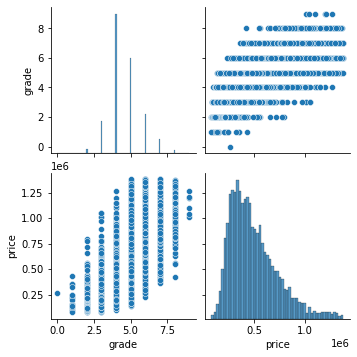

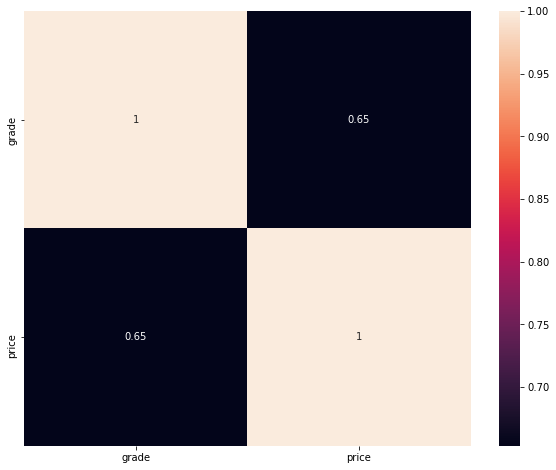

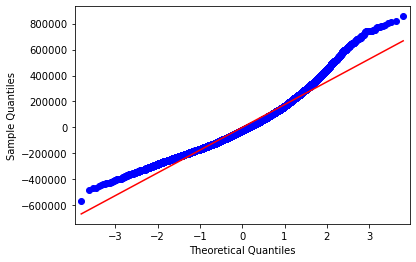

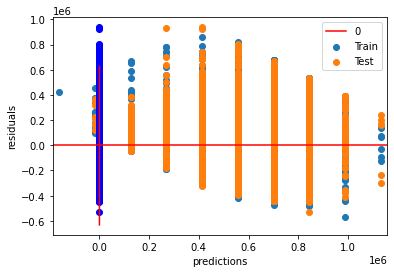

In [11]:

# Let's also check the assumptions of linearity.
functions.check_assumptions(X_train['grade'], y_train, train_preds, test_preds, y_test)

In [12]:
c_df['view'].value_counts(dropna=False)

NONE    19164
3.0       874
4.0       408
2.0       295
5.0       193
Name: view, dtype: int64

In [13]:
c_df['view'].unique()

array(['NONE', '4.0', '3.0', '5.0', '2.0'], dtype=object)

In [14]:
# check for view 
c_df['cat_view'].unique()

array(['NONE', nan, 'GOOD', 'AVERAGE', 'EXCELLENT', 'FAIR'], dtype=object)

In [15]:
#view_df = c_df.drop(c_df[c_df['cat_view'] == "NONE"])

In [16]:
view_df = c_df[c_df.view != "NONE"]
#view_df = c_df[c_df.cat_view.notnull()]

In [17]:
view_df.dropna(subset=['view'], inplace=True)

<ipython-input-17-ff791ed5d5a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_df.dropna(subset=['view'], inplace=True)


In [18]:
view_df['view'].value_counts(dropna=False)

3.0    874
4.0    408
2.0    295
5.0    193
Name: view, dtype: int64

In [19]:
view_df['view']

15       4.0
49       3.0
58       5.0
60       4.0
99       3.0
        ... 
21523    4.0
21538    3.0
21563    3.0
21577    3.0
21582    3.0
Name: view, Length: 1770, dtype: object

In [20]:
view_df['view'].astype(str).astype(float)

15      4.00
49      3.00
58      5.00
60      4.00
99      3.00
        ... 
21523   4.00
21538   3.00
21563   3.00
21577   3.00
21582   3.00
Name: view, Length: 1770, dtype: float64

In [21]:
view_df['view'] = pd.to_numeric(view_df['view'])/

<ipython-input-21-0c3e739d3aef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_df['view'] = pd.to_numeric(view_df['view'])


In [37]:
view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 15 to 21582
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1770 non-null   float64
 1   date            1770 non-null   object 
 2   yr_renovated    119 non-null    float64
 3   yr_built        1770 non-null   int64  
 4   condition       1770 non-null   int64  
 5   grade           1770 non-null   int64  
 6   view            1770 non-null   float64
 7   waterfront      1549 non-null   object 
 8   zipcode         1770 non-null   int64  
 9   lat             1770 non-null   float64
 10  long            1770 non-null   float64
 11  cat_waterfront  1549 non-null   object 
 12  cat_view        1770 non-null   object 
 13  cat_condition   1770 non-null   object 
 14  cat_grade       1770 non-null   object 
 15  cat_zipcode     1770 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 235.1+ KB


In [23]:
view_df.columns

Index(['price', 'date', 'yr_renovated', 'yr_built', 'condition', 'grade',
       'view', 'waterfront', 'zipcode', 'lat', 'long', 'cat_waterfront',
       'cat_view', 'cat_condition', 'cat_grade', 'cat_zipcode'],
      dtype='object')

In [24]:
view_df.dtypes

price             float64
date               object
yr_renovated      float64
yr_built            int64
condition           int64
grade               int64
view              float64
waterfront         object
zipcode             int64
lat               float64
long              float64
cat_waterfront     object
cat_view           object
cat_condition      object
cat_grade          object
cat_zipcode         int64
dtype: object

In [25]:
v_matrix = view_df.corr()
v_matrix['price']

price           1.00
yr_renovated    0.22
yr_built        0.11
condition       0.02
grade           0.61
view            0.21
zipcode        -0.08
lat             0.39
long           -0.01
cat_zipcode    -0.08
Name: price, dtype: float64

In [35]:
# showing different view 

fig = px.scatter_mapbox(view_df,
                        lat='lat',
                        lon='long',
                        color='view',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [27]:
# View 

#Train/Test Split
X = view_df.drop(columns=['price', 'date', 'yr_renovated', 'yr_built', 'condition', 'grade', 'waterfront', 'zipcode', 'lat', 'long', 'cat_waterfront', 'cat_view', 'cat_condition', 'cat_grade', 'cat_zipcode'])
y= view_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['view'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     50.94
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.66e-12
Time:                        00:45:00   Log-Likelihood:                -16550.
No. Observations:                1185   AIC:                         3.310e+04
Df Residuals:                    1183   BIC:                         3.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.925e+05   3.22e+04     15.307      0.000    4.29e+05    5.56e+05
view        6.731e+04   9431.625      7.137      0.000    4.88e+04    8.58e+04
==============================================================================
Omnibus:                       68.015   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.681
Skew:                           0.416   Prob(JB):                     5.99e-12
Kurtosis:                       2.406   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:

# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
train_preds = model.predict(sm.add_constant(X_train['view']))
test_preds = model.predict(sm.add_constant(X_test['view']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.0413
Test R2: 0.0500
****
Train RMSE: $281,237.49
Test RMSE: $273,601.09
****
Train MAE: $231,960.72
Test MAE: $219,114.37


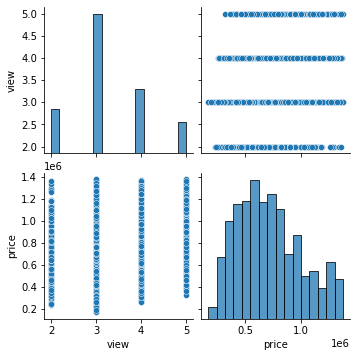

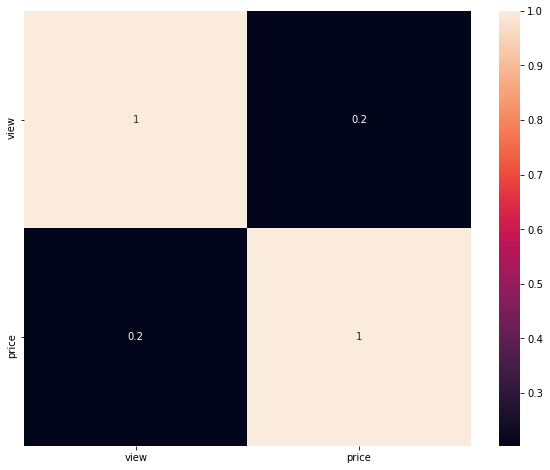

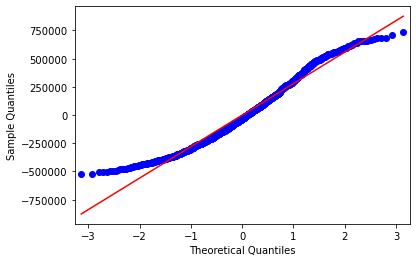

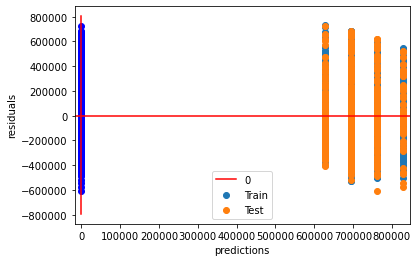

In [29]:
functions.check_assumptions(X_train['view'], y_train, train_preds, test_preds, y_test)

In [30]:

# Let's also check the assumptions of linearity.y_train, train_preds, test_preds, y_test)

In [31]:
X_train

,view
14081,3.00
2902,3.00
14989,3.00
14087,5.00
5610,3.00
...,...
16054,4.00
12190,4.00
7095,3.00
3729,5.00
